### CS-722 Machine Lerning
### Homework #4
#### Joseph S. Cannella

#### 1.) Implement yout own K-means Algorithm

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns
sns.set()  

<AxesSubplot:>

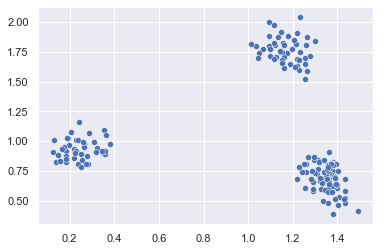

In [117]:
# Pull in raw data and plot it to examine it
A = np.loadtxt('A.txt', dtype='float', delimiter=' ')
Ax, Ay = zip(*A)
sns.scatterplot(x=Ax, y=Ay)

In [128]:
# Create a class for kMeans algorithm
class kMeans():
    def __init__(self, dataPoints, K, I):
        # Initialize Class Variables
        self.K = K
        
        # Establish a colormap for plotting
        cmap = cm.Spectral
        norm = Normalize(vmin=0, vmax = K-1)
        self.colorMap = cm.ScalarMappable(norm=norm, cmap=cmap)
        
        # Create Dataframe
        self.data = pd.DataFrame(dataPoints, columns=['x', 'y'])

        # Extract the coordinates
        X = self.data.x
        Y = self.data.y

        # Determine the range of values
        xMin = np.min(X)
        xMax = np.max(X)
        yMin = np.min(Y)
        yMax = np.max(Y)

        # Initialize Centroids
        self.centroids = { 
            i: [np.random.rand()*(xMax - xMin) + xMin,
                np.random.rand()*(yMax - yMin) + yMin]
            for i in range(K)}
        
        # Store the Sum of Squared Errors at each itteration
        self.SSE = []
        
        # Iterate I times
        for i in range(I):
            self.placePoints()
            self.updateCentroids()
            self.SSE.append(self.calcualteSSE())
 
    def toRGB(self, x):
        return self.colorMap.to_rgba(x)
    
    def plot(self):
        sns.scatterplot(data=self.data, x="x", y="y", hue="cluster", palette="deep")
        
    def plotSSE(self):
        sns.relplot(data=self.SSE, kind="line")
    
    def placePoints(self):
        distCols = []
        for k in self.centroids.keys():
            c = self.centroids[k]
            colName = k
            self.data[colName] = (self.data.x-c[0])**2 + (self.data.y-c[1])**2
            distCols.append(colName)
        self.data['cluster'] = self.data[distCols].idxmin(axis=1)
        self.data['color'] = self.data['cluster'].apply(self.toRGB)

    def updateCentroids(self):
        for i in self.centroids.keys():
            self.centroids[i][0] = np.mean(self.data[self.data['cluster'] == i]['x'])
            self.centroids[i][1] = np.mean(self.data[self.data['cluster'] == i]['y'])
            
    def calcualteSSE(self):
        # Note: Because we never took the square roots of our distances
        # we will not need to square them to calcuate the error
        # Sum of Squared Errors
        SSE = 0
        for k in range(self.K):
            SSE += np.sum(self.data[self.data['cluster'] == k][k])
        return SSE

In [4]:
# 1-a) Plot Sum of Squared Errors vs K
K_max = 10
SSE_K = []
K = [k for k in range(2, K_max+1)]
prevError = float('inf')
k = 2
while(k <= K_max):
    trial = kMeans(A, k, 10)
    error = trial.SSE[-1]
    print(f'K: {k}, SSE: {error}')
    if(error < prevError):
        SSE_K.append(trial.SSE[-1])
        prevError = error
        k += 1

K: 2, SSE: 38.178802426511545
K: 3, SSE: 2.60399663544384
K: 4, SSE: 2.60399663544384
K: 4, SSE: 2.6039966354438406
K: 4, SSE: 1.8924282560533372
K: 5, SSE: 2.6039966354438406
K: 5, SSE: 1.8916145982601664
K: 6, SSE: 1.6637501300003859
K: 7, SSE: 1.8892630435960143
K: 7, SSE: 2.2286281969290087
K: 7, SSE: 2.6039966354438406
K: 7, SSE: 2.60399663544384
K: 7, SSE: 2.3771513489242198
K: 7, SSE: 1.8879858148771738
K: 7, SSE: 2.2291283919021736
K: 7, SSE: 2.367532850738636
K: 7, SSE: 1.8905954165200063
K: 7, SSE: 1.2951200321990601
K: 8, SSE: 1.1317260054500704
K: 9, SSE: 1.664769311740546
K: 9, SSE: 1.91760541814813
K: 9, SSE: 1.6900950372386225
K: 9, SSE: 1.2927250284749794
K: 9, SSE: 1.1458459425407996
K: 9, SSE: 1.922762160547205
K: 9, SSE: 2.002283105382553
K: 9, SSE: 2.0697289858957637
K: 9, SSE: 1.2779310153491434
K: 9, SSE: 1.2931678911074609
K: 9, SSE: 2.0010330925369013
K: 9, SSE: 1.5154963418728475
K: 9, SSE: 1.4067128578297872
K: 9, SSE: 1.5586873496994957
K: 9, SSE: 1.555938811

[38.178802426511545, 2.60399663544384, 1.8924282560533372, 1.8916145982601664, 1.6637501300003859, 1.2951200321990601, 1.1317260054500704, 1.0574539242747438, 1.0535361801054992]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


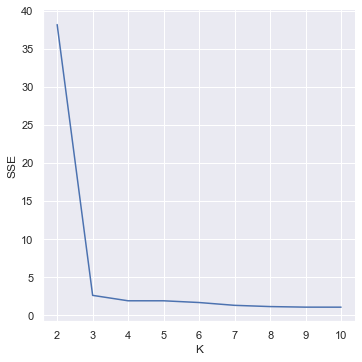

In [122]:
print(SSE_K)
print(K)
sns.relplot(x=K, y=SSE_K, kind="line").set_axis_labels("K", "SSE")

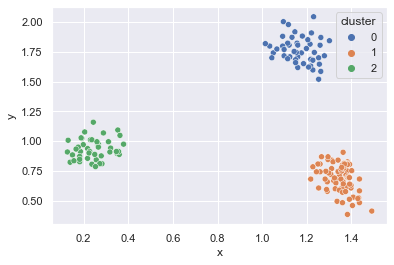

In [129]:
# 1-b.) Run Algorithm with K=3 and show clustering results
test1 = kMeans(A, 3, 10)
test1.plot()

#### 2.) Implement your own Agglomerative Heirarichical Clustering Algotithm

218


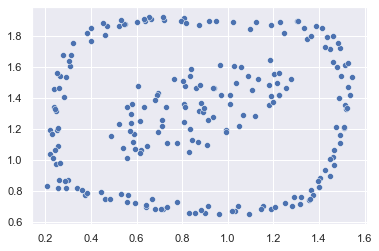

In [7]:
# Exploration:
# Pull in raw data and plot it to examine it
B = np.loadtxt('B.txt', dtype='float', delimiter=' ')
Bx, By = zip(*B)
sns.scatterplot(x=Bx, y=By)
print(len(B))

In [114]:
# Agglomeratve Heirarchical Clustering
class AHG():
    def __init__(self, dataPoints, K, method="min"):
        # Initialize Class Variables
        self.K = K
        self.method = method
        
        # 1.) Initialize: Let each point be a cluster
        self.clusters = list(map(lambda p: [list(p)], dataPoints))
        
        # 2.) Initialize: Compute the Distance Matrix
        self.D = self.computeDistanceMatrix(dataPoints)
        
        # 3.) Iterate
        while(len(self.D) > self.K):
            # Determine Closest Clusters
            I_C1, I_C2 = self.nearestClusters()
            
            # Temporarilty Store the Clusters to merged
            self.C1 = self.clusters[I_C1]
            self.C2 = self.clusters[I_C2]
            
            # Merge the Two Closest Clusters and Update the Distance Matrix
            self.D = self.updateDistanceMatrix(self.D, I_C1, I_C2, method=self.method)
        
        # Create a Cluster Dataframe with the final data
        self.createClusterDF()
        
    def computeDistanceMatrix(self, P):
        P = P.T
        # determine shape of data
        m,n = P.shape
        # Compute Gram Matrix
        G = np.dot(P.T, P)
        # Compute Matrix H
        H = np.tile(np.diag(G), (n,1))
        return H + H.T - 2*G

    # Merge Two Closest Clusters
    def nearestClusters(self):
        minVal = float('inf')
        minRow = 'nan'
        minCol = 'nan'
        for row in range(0, len(self.D)):
            for col in range(0, len(self.D)):
                if row != col:
                    currentVal = self.D[row][col]
                    if currentVal < minVal:
                        minVal = currentVal
                        minRow = row
                        minCol = col
        return [minRow, minCol]

    def mergeClusters(self, C, c1, c2):
        # Move all points from C2 to C1
        C[c1] = C[c1] + C[c2]

    def updateDistanceMatrix(self, dist, idx1, idx2, method="min"):
        # Determine which of the indices are smaller
        bigI = max(idx1, idx2)
        smallI = min(idx1, idx2)
        
        # Store the Cluster Distances to Be Merged
        Csmall = list(dist[smallI])
        Cbig = list(dist[bigI])
        
        # Remove their overlapping indices
        del Csmall[bigI]
        del Cbig[bigI]
        
        # Delete the one with the greate index from the table so we dont shift the other
        dist = np.delete(dist, bigI, axis=0)
        dist = np.delete(dist, bigI, axis=1)
        
        # Minimum Distance
        if(method == "min"):
            # Calculate their pairwise minima
            Cmin = np.minimum(Csmall, Cbig)
            dist[smallI] = Cmin
            for i in range(len(dist)):
                dist[i][smallI] = Cmin[i]
        
        # Maximum Distance
        if(method == "max"):
            # Calculate their pairwise minima
            Cmax = np.maximum(Csmall, Cbig)
            # Distance to self is always zero
            Cmax[smallI] = 0
            dist[smallI] = Cmax
            for i in range(len(dist)):
                dist[i][smallI] = Cmax[i]
        
        # Move all points from C2 to C1
        self.clusters[smallI] += self.clusters[bigI]
        # Delete one of the old clusters
        del self.clusters[bigI]

        # Group Average
        if(method == "groupAverage"):
            for i in range(len(dist)):
                averageDist = self.groupAverage(self.clusters[smallI], self.clusters[i])
                dist[i][smallI] = averageDist
                dist[smallI][i] = averageDist
            # Distance to self should always be zero
            dist[smallI][smallI] = 0
                
        # Distance Between Centroids
        elif(method == "centroidDistance"):
            # Distance to self should always be zero
            for i in range(len(dist)):
                centroidDist = self.getCentroidDists(self.clusters[smallI], self.clusters[i])
                dist[i][smallI] = centroidDist
                dist[smallI][i] = centroidDist
    
        return dist
    
    # Need helper functions for computing the Group Average
    # Compute average of pairwise distance between point in two clusters
    def groupAverage(self, C1, C2):
        sumSquaredDists = 0
        for c1 in C1:
            for c2 in C2:
                sumSquaredDists += ((c1[0]-c2[0])**2.0 + (c1[1]-c2[1])**2.0)
        return sumSquaredDists/(len(C1)*len(C2))

    # Need a helper method for computing Distance Between Centroids
    def getClusterCentroid(self, C):
        X, Y = np.array(C).T
        return np.sum(X)/len(C), np.sum(Y)/len(C)

    # Calculate the distance between centroids of two clusters
    def getCentroidDists(self, C1, C2):
        cent1 = self.getClusterCentroid(C1)
        cent2 = self.getClusterCentroid(C2)
        return (cent1[0] - cent2[0])**2.0 + (cent1[1] - cent2[1])**2.0

    # Establish a colormap for plotting
    def establishColorMap(self):
        cmap = cm.Spectral
        norm = Normalize(vmin=0, vmax=len(self.clusters))
        self.colorMap = cm.ScalarMappable(norm=norm, cmap=cmap)
        
    def toRGB(self, x):
        return self.colorMap.to_rgba(x)
    
    def createClusterDF(self):
        dtypes = {"x": np.float32, "y": np.float32, "cluster": np.int32}
        self.clusterDF = pd.DataFrame(columns=["x", "y", "cluster"]).astype(dtypes)
        for c_idx, cluster in enumerate(self.clusters):
            X, Y = np.array(cluster).T
            C_idx = np.full(len(cluster), c_idx, dtype=np.int32)
            data = np.array([X, Y, C_idx]).T
            cluster = pd.DataFrame(data, columns=["x", "y", "cluster"]).astype(dtypes)
            self.clusterDF = self.clusterDF.append(cluster)
    
    def plot(self):
        sns.scatterplot(data=self.clusterDF, x="x", y="y", hue="cluster")

#### 2-a.) MIN

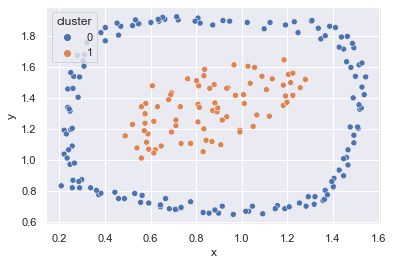

In [107]:
ahg = AHG(B, 2, method="min")
ahg.plot()

<AxesSubplot:>

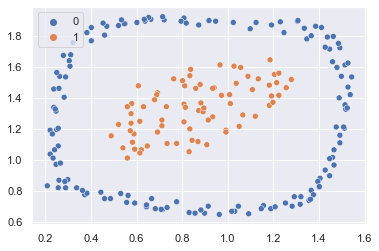

In [108]:
# Comparison with SciKit Learn
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='single').fit(B)
C = clustering.labels_
sns.scatterplot(x=Bx, y=By, hue=C)

#### 2-b.) MAX

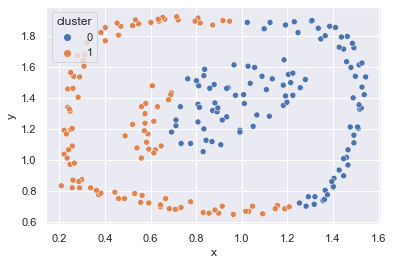

In [109]:
ahg = AHG(B, 2, method="max")
ahg.plot()

<AxesSubplot:>

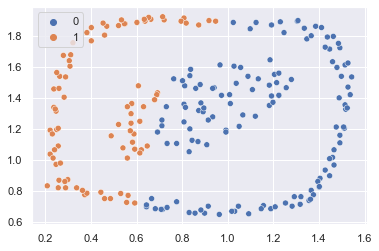

In [110]:
# Comparison with SciKit Learn
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='complete').fit(B)
C = clustering.labels_
sns.scatterplot(x=Bx, y=By, hue=C)

#### 2-c.) Group Average

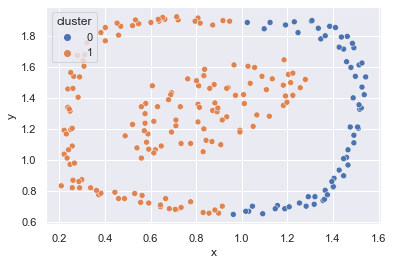

In [111]:
ahg = AHG(B, 2, method="groupAverage")
ahg.plot()

<AxesSubplot:>

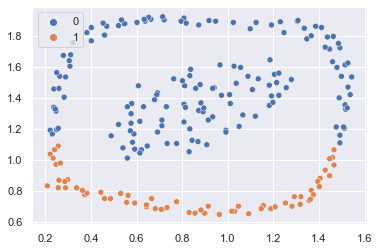

In [112]:
# Comparison with SciKit Learn
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average').fit(B)
C = clustering.labels_
sns.scatterplot(x=Bx, y=By, hue=C)

#### 2-d.) Distance Between Centroids

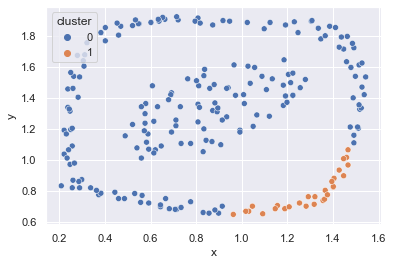

In [115]:
ahg = AHG(B, 2, method="centroidDistance")
ahg.plot()